# Infosys

# Candidate: Kauê Cabrera Rosalem

# Demand Forecasting Exercise
#### It is 2016. You have been hired by a large North American department store to help improve demand forecasting of item sales within their stores. The emphasis is on maximizing accuracy, through minimizing a metric called Weighted Mean Absolute Percentage Error (WMAPE) which takes as input the actual sales (A) and forecasted sales (F). Forecasts are to be made monthly for each item, with the forecast being sales in the upcoming month.
#### The data you have been provided with contains monthly sales information for 64 items over the previous 5 years, as well as details about store location, category and department. Your job is the following:
#### 1) Begin the task of modeling this data, and communicate your approach at the technical level. This may include elements of data exploration, choice of how to construct test/validation set, decisions/reasoning for feature engineering or model construction/selection, as well as any other information deemed relevant by you. Requirements for this portion include construction of at least two modeling approaches, code used to generate all results, and reporting models’ WMAPE within a validation set chosen by you. Prepare as if the audience was a senior member of the modeling/analytics department at the company.
#### 2) For each of the 64 items listed in the dataset, provide a prediction for future sales in the first month not listed in the dataset (April 2016).

## Libraries
#### Libraries used for code development.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Database
#### Data file provided for solving the challenge.

In [100]:
df = pd.read_csv('demandexercisedata.csv', ",")
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,2/1/2011,3/1/2011,4/1/2011,5/1/2011,...,6/1/2015,7/1/2015,8/1/2015,9/1/2015,10/1/2015,11/1/2015,12/1/2015,1/1/2016,2/1/2016,3/1/2016
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,14.0,19.0,25.0,20.0,18.0,17.0,22.0,24.0,29.0,29.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,7.0,15.0,18.0,9.0,10.0,12.0,27.0,4.0,5.0,10.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,10.0,10.0,12.0,20.0,16.0,23.0,45.0,6.0,9.0,15.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,17.0,23.0,34.0,...,59.0,64.0,57.0,51.0,64.0,52.0,49.0,64.0,60.0,53.0
4,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0.0,0.0,0.0,0.0,...,9.0,20.0,18.0,25.0,16.0,23.0,18.0,18.0,18.0,28.0


## Shape of database
#### Checking the dimensions of the database with respect to the number of attributes and records.

In [101]:
df.shape

(64, 68)

## Renaming database attributes
#### The attributes have been renamed in order to facilitate the programming of the WMAPE calculation.

In [102]:
df.columns = ['id','item_id','dept_id','cat_id','store_id','state_id','Forecast_1','Forecast_2','Forecast_3','Forecast_4','Forecast_5','Forecast_6','Forecast_7','Forecast_8','Forecast_9','Forecast_10','Forecast_11','Forecast_12','Forecast_13','Forecast_14','Forecast_15','Forecast_16','Forecast_17','Forecast_18','Forecast_19','Forecast_20','Forecast_21','Forecast_22','Forecast_23','Forecast_24','Forecast_25','Forecast_26','Forecast_27','Forecast_28','Forecast_29','Forecast_30','Forecast_31','Forecast_32','Forecast_33','Forecast_34','Forecast_35','Forecast_36','Forecast_37','Forecast_38','Forecast_39','Forecast_40','Forecast_41','Forecast_42','Forecast_43','Forecast_44','Forecast_45','Forecast_46','Forecast_47','Forecast_48','Forecast_49','Forecast_50','Forecast_51','Forecast_52','Forecast_53','Forecast_54','Forecast_55','Forecast_56','Forecast_57','Forecast_58','Forecast_59','Forecast_60','Forecast_61','Forecast_62']
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,Forecast_1,Forecast_2,Forecast_3,Forecast_4,...,Forecast_53,Forecast_54,Forecast_55,Forecast_56,Forecast_57,Forecast_58,Forecast_59,Forecast_60,Forecast_61,Forecast_62
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,14.0,19.0,25.0,20.0,18.0,17.0,22.0,24.0,29.0,29.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,7.0,15.0,18.0,9.0,10.0,12.0,27.0,4.0,5.0,10.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,10.0,10.0,12.0,20.0,16.0,23.0,45.0,6.0,9.0,15.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,17.0,23.0,34.0,...,59.0,64.0,57.0,51.0,64.0,52.0,49.0,64.0,60.0,53.0
4,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0.0,0.0,0.0,0.0,...,9.0,20.0,18.0,25.0,16.0,23.0,18.0,18.0,18.0,28.0


## Total sales value
#### Calculating the total sales value for each record (id).

In [103]:
df["sales_total"]= df.iloc[:, -64:-1].sum(axis=1)
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,Forecast_1,Forecast_2,Forecast_3,Forecast_4,...,Forecast_54,Forecast_55,Forecast_56,Forecast_57,Forecast_58,Forecast_59,Forecast_60,Forecast_61,Forecast_62,sales_total
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,19.0,25.0,20.0,18.0,17.0,22.0,24.0,29.0,29.0,545.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,15.0,18.0,9.0,10.0,12.0,27.0,4.0,5.0,10.0,482.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,10.0,12.0,20.0,16.0,23.0,45.0,6.0,9.0,15.0,257.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,17.0,23.0,34.0,...,64.0,57.0,51.0,64.0,52.0,49.0,64.0,60.0,53.0,3184.0
4,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0.0,0.0,0.0,0.0,...,20.0,18.0,25.0,16.0,23.0,18.0,18.0,18.0,28.0,497.0


## WMAPE numerator
#### Sum values in the numerator of the expression WMAPE.

In [104]:
wmape_numerator_1 = (df['Forecast_1'] - df['Forecast_2']).abs() 
wmape_numerator_2 = (df['Forecast_2'] - df['Forecast_3']).abs() 
wmape_numerator_3 = (df['Forecast_3'] - df['Forecast_4']).abs() 
wmape_numerator_4 = (df['Forecast_4'] - df['Forecast_5']).abs() 
wmape_numerator_5 = (df['Forecast_5'] - df['Forecast_6']).abs() 
wmape_numerator_6 = (df['Forecast_6'] - df['Forecast_7']).abs() 
wmape_numerator_7 = (df['Forecast_7'] - df['Forecast_8']).abs() 
wmape_numerator_8 = (df['Forecast_8'] - df['Forecast_9']).abs() 
wmape_numerator_9 = (df['Forecast_9'] - df['Forecast_10']).abs() 
wmape_numerator_10 = (df['Forecast_10'] - df['Forecast_11']).abs() 
wmape_numerator_11 = (df['Forecast_11'] - df['Forecast_12']).abs() 
wmape_numerator_12 = (df['Forecast_12'] - df['Forecast_13']).abs() 
wmape_numerator_13 = (df['Forecast_13'] - df['Forecast_14']).abs() 
wmape_numerator_14 = (df['Forecast_14'] - df['Forecast_15']).abs() 
wmape_numerator_15 = (df['Forecast_15'] - df['Forecast_16']).abs() 
wmape_numerator_16 = (df['Forecast_16'] - df['Forecast_17']).abs() 
wmape_numerator_17 = (df['Forecast_17'] - df['Forecast_18']).abs() 
wmape_numerator_18 = (df['Forecast_18'] - df['Forecast_19']).abs() 
wmape_numerator_19 = (df['Forecast_19'] - df['Forecast_20']).abs() 
wmape_numerator_20 = (df['Forecast_20'] - df['Forecast_21']).abs() 
wmape_numerator_21 = (df['Forecast_21'] - df['Forecast_22']).abs() 
wmape_numerator_22 = (df['Forecast_22'] - df['Forecast_23']).abs() 
wmape_numerator_23 = (df['Forecast_23'] - df['Forecast_24']).abs() 
wmape_numerator_24 = (df['Forecast_24'] - df['Forecast_25']).abs() 
wmape_numerator_25 = (df['Forecast_25'] - df['Forecast_26']).abs() 
wmape_numerator_26 = (df['Forecast_26'] - df['Forecast_27']).abs() 
wmape_numerator_27 = (df['Forecast_27'] - df['Forecast_28']).abs() 
wmape_numerator_28 = (df['Forecast_28'] - df['Forecast_29']).abs() 
wmape_numerator_29 = (df['Forecast_29'] - df['Forecast_30']).abs() 
wmape_numerator_30 = (df['Forecast_30'] - df['Forecast_31']).abs() 
wmape_numerator_31 = (df['Forecast_31'] - df['Forecast_32']).abs() 
wmape_numerator_32 = (df['Forecast_32'] - df['Forecast_33']).abs() 
wmape_numerator_33 = (df['Forecast_33'] - df['Forecast_34']).abs() 
wmape_numerator_34 = (df['Forecast_34'] - df['Forecast_35']).abs() 
wmape_numerator_35 = (df['Forecast_35'] - df['Forecast_36']).abs() 
wmape_numerator_36 = (df['Forecast_36'] - df['Forecast_37']).abs() 
wmape_numerator_37 = (df['Forecast_37'] - df['Forecast_38']).abs() 
wmape_numerator_38 = (df['Forecast_38'] - df['Forecast_39']).abs() 
wmape_numerator_39 = (df['Forecast_39'] - df['Forecast_40']).abs() 
wmape_numerator_40 = (df['Forecast_40'] - df['Forecast_41']).abs()
wmape_numerator_41 = (df['Forecast_41'] - df['Forecast_42']).abs() 
wmape_numerator_42 = (df['Forecast_42'] - df['Forecast_43']).abs() 
wmape_numerator_43 = (df['Forecast_43'] - df['Forecast_44']).abs() 
wmape_numerator_44 = (df['Forecast_44'] - df['Forecast_45']).abs() 
wmape_numerator_45 = (df['Forecast_45'] - df['Forecast_46']).abs() 
wmape_numerator_46 = (df['Forecast_46'] - df['Forecast_47']).abs() 
wmape_numerator_47 = (df['Forecast_47'] - df['Forecast_48']).abs() 
wmape_numerator_48 = (df['Forecast_48'] - df['Forecast_49']).abs() 
wmape_numerator_49 = (df['Forecast_49'] - df['Forecast_50']).abs() 
wmape_numerator_50 = (df['Forecast_50'] - df['Forecast_51']).abs() 
wmape_numerator_51 = (df['Forecast_51'] - df['Forecast_52']).abs() 
wmape_numerator_52 = (df['Forecast_52'] - df['Forecast_53']).abs() 
wmape_numerator_53 = (df['Forecast_53'] - df['Forecast_54']).abs() 
wmape_numerator_54 = (df['Forecast_54'] - df['Forecast_55']).abs() 
wmape_numerator_55 = (df['Forecast_55'] - df['Forecast_56']).abs() 
wmape_numerator_56 = (df['Forecast_56'] - df['Forecast_57']).abs() 
wmape_numerator_57 = (df['Forecast_57'] - df['Forecast_58']).abs() 
wmape_numerator_58 = (df['Forecast_58'] - df['Forecast_59']).abs() 
wmape_numerator_59 = (df['Forecast_59'] - df['Forecast_60']).abs() 
wmape_numerator_60 = (df['Forecast_60'] - df['Forecast_61']).abs() 
wmape_numerator_61 = (df['Forecast_61'] - df['Forecast_62']).abs()

df['wmape_numerator_total'] = wmape_numerator_1 + wmape_numerator_2 + wmape_numerator_3 + wmape_numerator_4 + wmape_numerator_5 + wmape_numerator_6 + wmape_numerator_7 + wmape_numerator_8 + wmape_numerator_9 + wmape_numerator_10 + wmape_numerator_11 + wmape_numerator_12 + wmape_numerator_13 + wmape_numerator_14 + wmape_numerator_15 + wmape_numerator_16 + wmape_numerator_17 + wmape_numerator_18 + wmape_numerator_19 + wmape_numerator_20 + wmape_numerator_21 + wmape_numerator_22 + wmape_numerator_23 + wmape_numerator_24 + wmape_numerator_25 + wmape_numerator_26 + wmape_numerator_27 + wmape_numerator_28 + wmape_numerator_29 + wmape_numerator_30 + wmape_numerator_31 + wmape_numerator_32 + wmape_numerator_33 + wmape_numerator_34 + wmape_numerator_35 + wmape_numerator_36 + wmape_numerator_37 + wmape_numerator_38 + wmape_numerator_39 + wmape_numerator_40 + wmape_numerator_41 + wmape_numerator_42 + wmape_numerator_43 + wmape_numerator_44 + wmape_numerator_45 + wmape_numerator_46 + wmape_numerator_47 + wmape_numerator_48 + wmape_numerator_49 + wmape_numerator_50 + wmape_numerator_51 + wmape_numerator_52 + wmape_numerator_53 + wmape_numerator_54 + wmape_numerator_55 + wmape_numerator_56 + wmape_numerator_57 + wmape_numerator_58 + wmape_numerator_59 + wmape_numerator_60 + wmape_numerator_61

## WMAPE divisor
#### Sum values in the divisor of the expression WMAPE.

In [105]:
df['wmape_divisor_total'] = df['Forecast_1'] + df['Forecast_2'] + df['Forecast_3'] + df['Forecast_4'] + df['Forecast_5'] + df['Forecast_6'] + df['Forecast_7'] + df['Forecast_8'] + df['Forecast_9'] + df['Forecast_10'] + df['Forecast_11'] + df['Forecast_12'] + df['Forecast_13'] + df['Forecast_14'] + df['Forecast_15'] + df['Forecast_16'] + df['Forecast_17'] + df['Forecast_18'] + df['Forecast_19'] + df['Forecast_20'] + df['Forecast_21'] + df['Forecast_22'] + df['Forecast_23'] + df['Forecast_24'] + df['Forecast_25'] + df['Forecast_26'] + df['Forecast_27'] + df['Forecast_28'] + df['Forecast_29'] + df['Forecast_30'] + df['Forecast_31'] + df['Forecast_32'] + df['Forecast_33'] + df['Forecast_34'] + df['Forecast_35'] + df['Forecast_36'] + df['Forecast_37'] + df['Forecast_38'] + df['Forecast_39'] + df['Forecast_40'] + df['Forecast_41'] + df['Forecast_42'] + df['Forecast_43'] + df['Forecast_44'] + df['Forecast_45'] + df['Forecast_46'] + df['Forecast_47'] + df['Forecast_48'] + df['Forecast_49'] + df['Forecast_50'] + df['Forecast_51'] + df['Forecast_52'] + df['Forecast_53'] + df['Forecast_54'] + df['Forecast_55'] + df['Forecast_56'] + df['Forecast_57'] + df['Forecast_58'] + df['Forecast_59'] + df['Forecast_60'] + df['Forecast_61'] + df['Forecast_62']

## WMAPE
#### Calculation of WMAPE as stated in the challenge description.

In [106]:
df['wmape_total'] = df['wmape_numerator_total'] / df['wmape_divisor_total']
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,Forecast_1,Forecast_2,Forecast_3,Forecast_4,...,Forecast_57,Forecast_58,Forecast_59,Forecast_60,Forecast_61,Forecast_62,sales_total,wmape_numerator_total,wmape_divisor_total,wmape_total
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,18.0,17.0,22.0,24.0,29.0,29.0,545.0,143.0,574.0,0.249129
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,10.0,12.0,27.0,4.0,5.0,10.0,482.0,298.0,492.0,0.605691
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,16.0,23.0,45.0,6.0,9.0,15.0,257.0,155.0,272.0,0.569853
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,17.0,23.0,34.0,...,64.0,52.0,49.0,64.0,60.0,53.0,3184.0,661.0,3237.0,0.204201
4,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0.0,0.0,0.0,0.0,...,16.0,23.0,18.0,18.0,18.0,28.0,497.0,140.0,525.0,0.266667


## WMAPE by Item
#### Checking the distribution of values obtained from WMAPE by items sold.

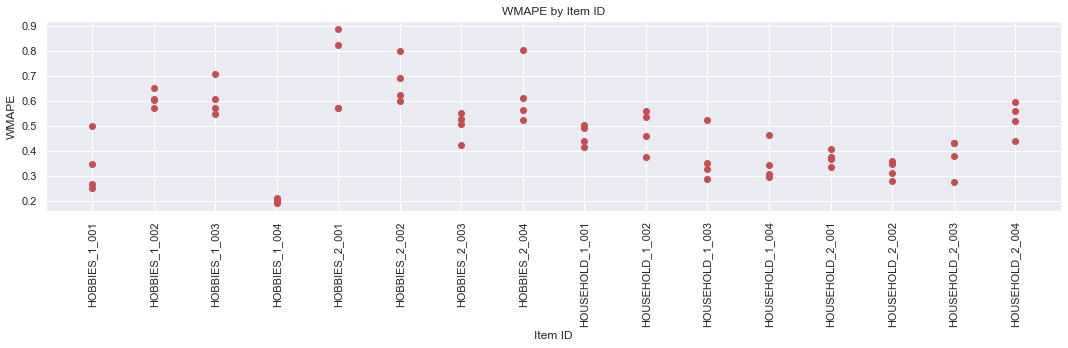

In [107]:
plt.figure(figsize = (15, 5))
plt.plot(df['item_id'],df['wmape_total'], 'ro')
plt.xticks(rotation=90)
plt.yticks()
plt.xlabel('Item ID')
plt.ylabel('WMAPE')
plt.title('WMAPE by Item ID')
plt.savefig('wmapebyitem.png', format='png')
plt.tight_layout()

In [108]:
df_id_wmape = df[['wmape_total', 'sales_total','item_id']]
df_id_wmape.head()

,wmape_total,sales_total,item_id
0,0.249129,545.0,HOBBIES_1_001
1,0.605691,482.0,HOBBIES_1_002
2,0.569853,257.0,HOBBIES_1_003
3,0.204201,3184.0,HOBBIES_1_004
4,0.266667,497.0,HOBBIES_1_001



#### Plotting the bar chart of total sales by item.

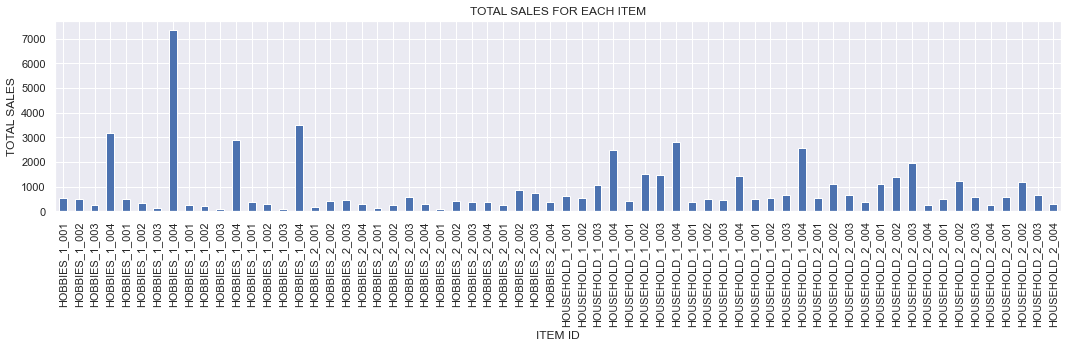

In [109]:
plt.figure(figsize = (15, 5))
ax = df_id_wmape['sales_total'].plot.bar()
plt.xlabel('ITEM ID')
plt.ylabel('TOTAL SALES')
plt.title('TOTAL SALES FOR EACH ITEM')
ax.set_xticks(df_id_wmape.index.tolist())
ax.set_xticklabels(df_id_wmape.item_id.tolist(),rotation=90)
plt.tight_layout()

#### Plotting bar chart of WMAPE by item.

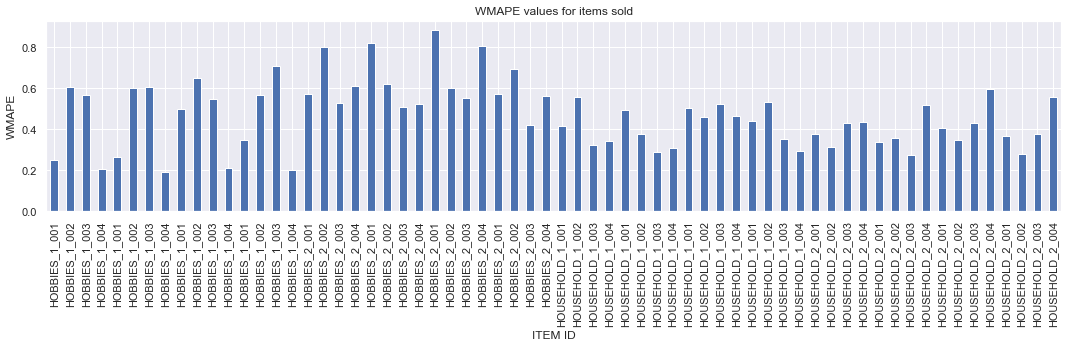

In [110]:
plt.figure(figsize = (15, 5))
ax = df_id_wmape['wmape_total'].plot.bar()
plt.xlabel('ITEM ID')
plt.ylabel('WMAPE')
plt.title('WMAPE values for items sold')
ax.set_xticks(df_id_wmape.index.tolist())
ax.set_xticklabels(df_id_wmape.item_id.tolist(),rotation=90)
plt.tight_layout()

## Total sales by item and store
#### Counting total sales by item and stores.

In [111]:
df_sales_store = (df.pivot_table(['sales_total'],['store_id'],['item_id']))
df_sales_store["sales_store"] = df_sales_store.iloc[:, -16:-1].sum(axis=1)
df_sales_store

sales_total                                            \
item_id  HOBBIES_1_001 HOBBIES_1_002 HOBBIES_1_003 HOBBIES_1_004   
store_id                                                           
CA_1             545.0         482.0         257.0        3184.0   
CA_2             497.0         323.0         121.0        7353.0   
TX_1             240.0         216.0          86.0        2894.0   
TX_2             386.0         293.0          97.0        3494.0   

                                                                  \
item_id  HOBBIES_2_001 HOBBIES_2_002 HOBBIES_2_003 HOBBIES_2_004   
store_id                                                           
CA_1             169.0         431.0         446.0         283.0   
CA_2             124.0         269.0         599.0         287.0   
TX_1              78.0         412.0         362.0         388.0   
TX_2             239.0         862.0         745.0         384.0   

                                                                          \
item_id  HOUSEHOLD_1_001 HOUSEHOLD_1_002 HOUSEHOLD_1_003 HOUSEHOLD_1_004   
store_id                                                                   
CA_1               639.0           520.0          1057.0          2503.0   
CA_2               398.0          1497.0          1463.0          2793.0   
TX_1               380.0           500.0           440.0          1447.0   
TX_2               491.0           555.0           680.0          2555.0   

                                                                          \
item_id  HOUSEHOLD_2_001 HOUSEHOLD_2_002 HOUSEHOLD_2_003 HOUSEHOLD_2_004   
store_id                                                                   
CA_1               522.0          1107.0           644.0           374.0   
CA_2              1124.0          1391.0          1940.0           252.0   
TX_1               493.0          1240.0           581.0           253.0   
TX_2               594.0          1186.0           650.0           277.0   

         sales_store  
item_id               
store_id              
CA_1         12789.0  
CA_2         20179.0  
TX_1          9757.0  
TX_2         13211.0

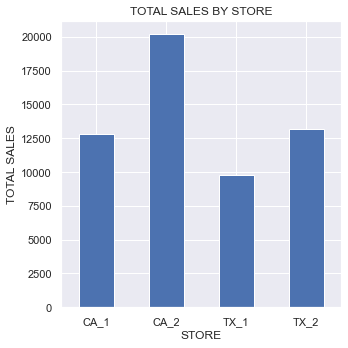

In [112]:
plt.figure(figsize = (5, 5))
ax = df_sales_store['sales_store'].plot.bar()
plt.xlabel('STORE')
plt.xticks(rotation=0)
plt.ylabel('TOTAL SALES')
plt.title('TOTAL SALES BY STORE')
plt.tight_layout()

In [113]:
df_sales = (df.pivot_table(['sales_total'],['item_id'],['store_id']))
df_sales["sales_item"] = df_sales.iloc[:, -4:-1].sum(axis=1)
df_sales

sales_total                         sales_item
store_id               CA_1    CA_2    TX_1    TX_2           
item_id                                                       
HOBBIES_1_001         545.0   497.0   240.0   386.0     1282.0
HOBBIES_1_002         482.0   323.0   216.0   293.0     1021.0
HOBBIES_1_003         257.0   121.0    86.0    97.0      464.0
HOBBIES_1_004        3184.0  7353.0  2894.0  3494.0    13431.0
HOBBIES_2_001         169.0   124.0    78.0   239.0      371.0
HOBBIES_2_002         431.0   269.0   412.0   862.0     1112.0
HOBBIES_2_003         446.0   599.0   362.0   745.0     1407.0
HOBBIES_2_004         283.0   287.0   388.0   384.0      958.0
HOUSEHOLD_1_001       639.0   398.0   380.0   491.0     1417.0
HOUSEHOLD_1_002       520.0  1497.0   500.0   555.0     2517.0
HOUSEHOLD_1_003      1057.0  1463.0   440.0   680.0     2960.0
HOUSEHOLD_1_004      2503.0  2793.0  1447.0  2555.0     6743.0
HOUSEHOLD_2_001       522.0  1124.0   493.0   594.0     2139.0
HOUSEHOLD_2_002      1107.0  1391.0  1240.0  1186.0     3738.0
HOUSEHOLD_2_003       644.0  1940.0   581.0   650.0     3165.0
HOUSEHOLD_2_004       374.0   252.0   253.0   277.0      879.0

<Figure size 432x288 with 0 Axes>

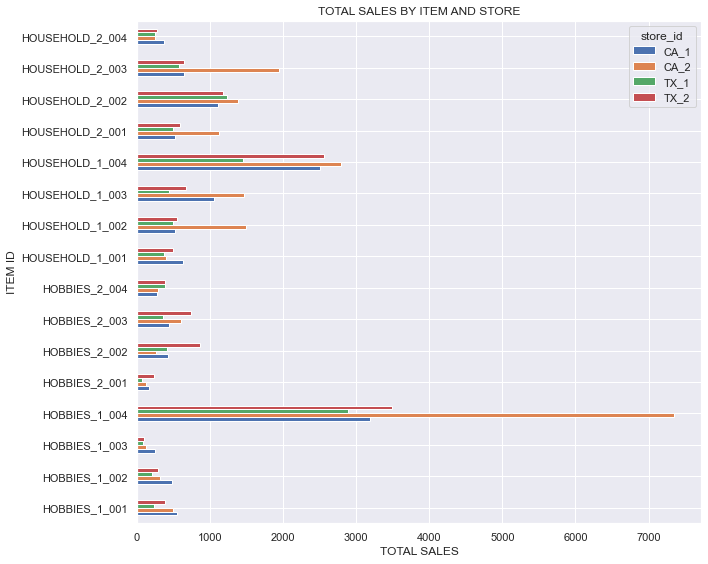

In [114]:
plt.figure()
df_sales['sales_total'].plot.barh(figsize=(10,8))
plt.xlabel('TOTAL SALES')
plt.ylabel('ITEM ID')
plt.title('TOTAL SALES BY ITEM AND STORE')
plt.tight_layout()

## Linear Regression
#### Dataset for predictive model training: The sales in 2/1/2016 (Forecast_61) and 3/1/2016 (Forecast_62) were selected as training in the linear regression.

In [115]:
list_input = list(zip(df['Forecast_61'])) # multiple input variables
list_output = (df['Forecast_62']).to_list() # output sales forecast
x, y = np.array(list_input), np.array(list_output)

## Coeficience of Determination
#### Calculation of the linear regression determination coefficient to measure how well the observed results are replicated by the model.

In [116]:
model = LinearRegression().fit(x, y.reshape((-1, 1))) # creating model
r_sq = model.score(x, y) # Coeficience of Determination
print('Coeficience of Determination:', r_sq)

Coeficience of Determination: 0.7778689467826062


## Predicting April 2016
#### Determining the sales value for 4/1/2016 (Forecast_63) using the linear regression model based on the previous month's sales.

In [117]:
predicted_x = np.array([df['Forecast_62']]).reshape((-1, 1))
Forecast_63_predict = model.predict(predicted_x)
df['Forecast_63'] = Forecast_63_predict.round()
df['Forecast_63'].head(64)

0     27.0
1     10.0
2     15.0
3     48.0
4     26.0
      ... 
59     3.0
60     9.0
61    41.0
62     8.0
63    16.0
Name: Forecast_63, Length: 64, dtype: float64

#### Analyzing the expected sales in April 2016 for each item.

In [118]:
df_predict = df[['state_id','cat_id','store_id','item_id','Forecast_62','Forecast_63']]
df_predict.head(64)

,state_id,cat_id,store_id,item_id,Forecast_62,Forecast_63
0,CA,HOBBIES,CA_1,HOBBIES_1_001,29.0,27.0
1,CA,HOBBIES,CA_1,HOBBIES_1_002,10.0,10.0
2,CA,HOBBIES,CA_1,HOBBIES_1_003,15.0,15.0
3,CA,HOBBIES,CA_1,HOBBIES_1_004,53.0,48.0
4,CA,HOBBIES,CA_2,HOBBIES_1_001,28.0,26.0
...,...,...,...,...,...,...
59,TX,HOUSEHOLD,TX_1,HOUSEHOLD_2_004,2.0,3.0
60,TX,HOUSEHOLD,TX_2,HOUSEHOLD_2_001,9.0,9.0
61,TX,HOUSEHOLD,TX_2,HOUSEHOLD_2_002,45.0,41.0
62,TX,HOUSEHOLD,TX_2,HOUSEHOLD_2_003,7.0,8.0


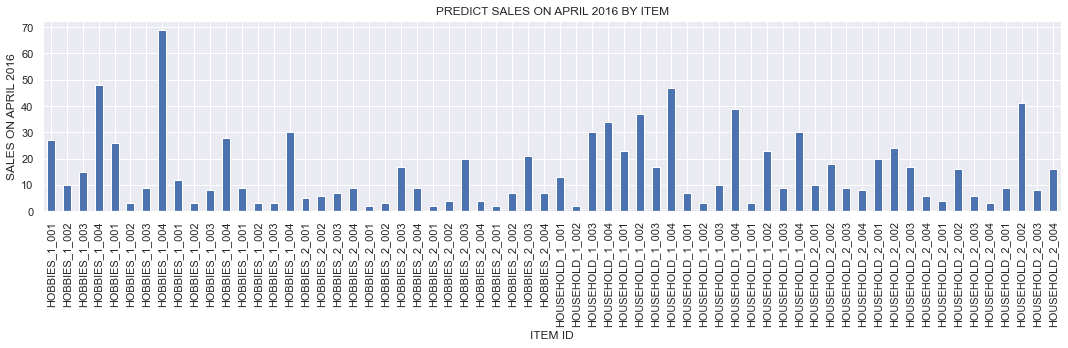

In [119]:
plt.figure(figsize = (15, 5))
ax = df_predict['Forecast_63'].plot.bar()
plt.xlabel('ITEM ID')
plt.ylabel('SALES ON APRIL 2016')
plt.title('PREDICT SALES ON APRIL 2016 BY ITEM')
ax.set_xticks(df_predict.index.tolist())
ax.set_xticklabels(df_predict.item_id.tolist(),rotation=90)
plt.tight_layout()

#### Analyzing the expected sales in April 2016 for each store.

In [120]:
df_sales_store_predict = (df_predict.pivot_table(['Forecast_63'],['store_id'],['item_id']))
df_sales_store_predict["sales_store"] = df_sales_store_predict.iloc[:, -16:-1].sum(axis=1)
df_sales_store_predict

Forecast_63                                            \
item_id  HOBBIES_1_001 HOBBIES_1_002 HOBBIES_1_003 HOBBIES_1_004   
store_id                                                           
CA_1              27.0          10.0          15.0          48.0   
CA_2              26.0           3.0           9.0          69.0   
TX_1              12.0           3.0           8.0          28.0   
TX_2               9.0           3.0           3.0          30.0   

                                                                  \
item_id  HOBBIES_2_001 HOBBIES_2_002 HOBBIES_2_003 HOBBIES_2_004   
store_id                                                           
CA_1               5.0           6.0           7.0           9.0   
CA_2               2.0           3.0          17.0           9.0   
TX_1               2.0           4.0          20.0           4.0   
TX_2               2.0           7.0          21.0           7.0   

                                                                          \
item_id  HOUSEHOLD_1_001 HOUSEHOLD_1_002 HOUSEHOLD_1_003 HOUSEHOLD_1_004   
store_id                                                                   
CA_1                13.0             2.0            30.0            34.0   
CA_2                23.0            37.0            17.0            47.0   
TX_1                 7.0             3.0            10.0            39.0   
TX_2                 3.0            23.0             9.0            30.0   

                                                                          \
item_id  HOUSEHOLD_2_001 HOUSEHOLD_2_002 HOUSEHOLD_2_003 HOUSEHOLD_2_004   
store_id                                                                   
CA_1                10.0            18.0             9.0             8.0   
CA_2                20.0            24.0            17.0             6.0   
TX_1                 4.0            16.0             6.0             3.0   
TX_2                 9.0            41.0             8.0            16.0   

         sales_store  
item_id               
store_id              
CA_1           243.0  
CA_2           323.0  
TX_1           166.0  
TX_2           205.0

<Figure size 432x288 with 0 Axes>

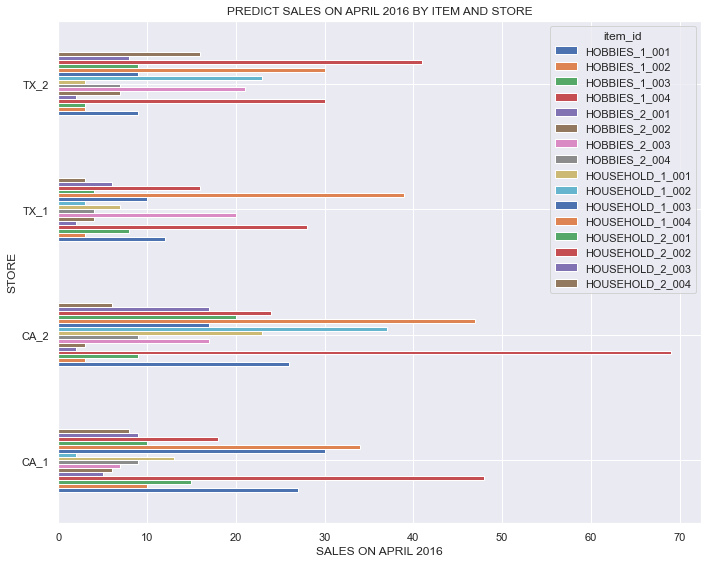

In [121]:
plt.figure()
ax = df_sales_store_predict['Forecast_63'].plot.barh(figsize=(10,8))
plt.xlabel('SALES ON APRIL 2016')
plt.ylabel('STORE')
plt.title('PREDICT SALES ON APRIL 2016 BY ITEM AND STORE')
plt.tight_layout()

#### Analyzing the expected sales in April 2016 for each state.

In [122]:
df_sales_store_predict2 = (df_predict.pivot_table(['Forecast_63'],['state_id'],['item_id']))
df_sales_store_predict2["sales_state"] = df_sales_store_predict2.iloc[:, -16:-1].sum(axis=1)
df_sales_store_predict2

Forecast_63                                            \
item_id  HOBBIES_1_001 HOBBIES_1_002 HOBBIES_1_003 HOBBIES_1_004   
state_id                                                           
CA                26.5           6.5          12.0          58.5   
TX                10.5           3.0           5.5          29.0   

                                                                  \
item_id  HOBBIES_2_001 HOBBIES_2_002 HOBBIES_2_003 HOBBIES_2_004   
state_id                                                           
CA                 3.5           4.5          12.0           9.0   
TX                 2.0           5.5          20.5           5.5   

                                                                          \
item_id  HOUSEHOLD_1_001 HOUSEHOLD_1_002 HOUSEHOLD_1_003 HOUSEHOLD_1_004   
state_id                                                                   
CA                  18.0            19.5            23.5            40.5   
TX                   5.0            13.0             9.5            34.5   

                                                                          \
item_id  HOUSEHOLD_2_001 HOUSEHOLD_2_002 HOUSEHOLD_2_003 HOUSEHOLD_2_004   
state_id                                                                   
CA                  15.0            21.0            13.0             7.0   
TX                   6.5            28.5             7.0             9.5   

         sales_state  
item_id               
state_id              
CA             283.0  
TX             185.5

<Figure size 432x288 with 0 Axes>

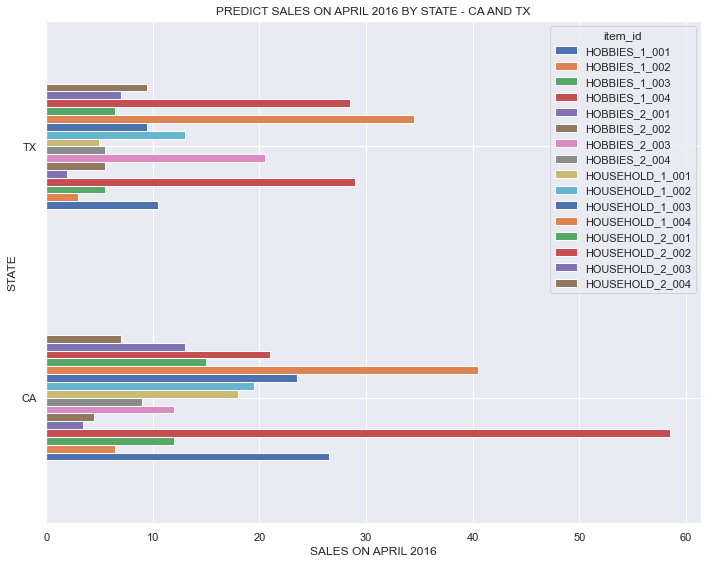

In [123]:
plt.figure()
ax = df_sales_store_predict2['Forecast_63'].plot.barh(figsize=(10,8))
plt.xlabel('SALES ON APRIL 2016')
plt.ylabel('STATE')
plt.title('PREDICT SALES ON APRIL 2016 BY STATE - CA AND TX')
plt.tight_layout()